# Work Flow
## 1. Preparing Environment
- 1.1 import packages
- 1.2 load the Datasets

## 2. Exploratory Data Analysis (EDA)
- 2.1 observe the Datasets
- 2.2 see some stats of numeric data
- 2.3 Split data

## 3. Training Algorithm & Evaluate data
- 3.1 Apply algorith
- 3.2 Check the residual
- 3.2 check p-value and correlation




## 1.Preparing Environment
- 1.1 Import Packages

In [1]:
# data manipulation library
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#library machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# statistic library 
import statsmodels.api as sm

# dataset
import csv

- 1.2 Load Datasets

In [41]:
test_ori_data = pd.read_csv('/home/fajrin/ML_29/Linear_reg/house_price_3/test (1).csv')
train_ori_data = pd.read_csv('/home/fajrin/ML_29/Linear_reg/house_price_3/train (1).csv')

# now we drop the Id columns as an index
test_data = test_ori_data.drop('Id',axis=1 )
train_data = train_ori_data.drop('Id',axis =1)
train_data[train_data.MSZoning=='RL'].LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1151, dtype: float64

## 2.Exploratory Data Analysis (EDA)
### 2.1 observe the data sets

In [3]:
def detail (df):
    types = df.dtypes
    counts = df.count()
    #uniques = df.apply(lambda x: [x.unique()])
    distincts = df.apply(lambda x : x.unique().shape[0])
    missing_ratio = df.isnull().sum()/df.shape[0]*100
    nulls = df.apply(lambda x : x.isnull().sum())
    skew = df.skew()
    data1 = {'types':types,'counts':counts,'distincts':distincts,
             'missing_ratio':missing_ratio,'nulls':nulls,'skewness':skew}
    data = pd.DataFrame(data1)
    return data



In [4]:
detail_data =detail(train_data)
detail_data

,types,counts,distincts,missing_ratio,nulls,skewness
1stFlrSF,int64,1460,753,0.000000,0,1.376757
2ndFlrSF,int64,1460,417,0.000000,0,0.813030
3SsnPorch,int64,1460,20,0.000000,0,10.304342
Alley,object,91,3,93.767123,1369,NaN
BedroomAbvGr,int64,1460,8,0.000000,0,0.211790
...,...,...,...,...,...,...
Utilities,object,1460,2,0.000000,0,NaN
WoodDeckSF,int64,1460,274,0.000000,0,1.541376
YearBuilt,int64,1460,112,0.000000,0,-0.613461
YearRemodAdd,int64,1460,61,0.000000,0,-0.503562


### 2.2 see the numeric statistic data

In [5]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


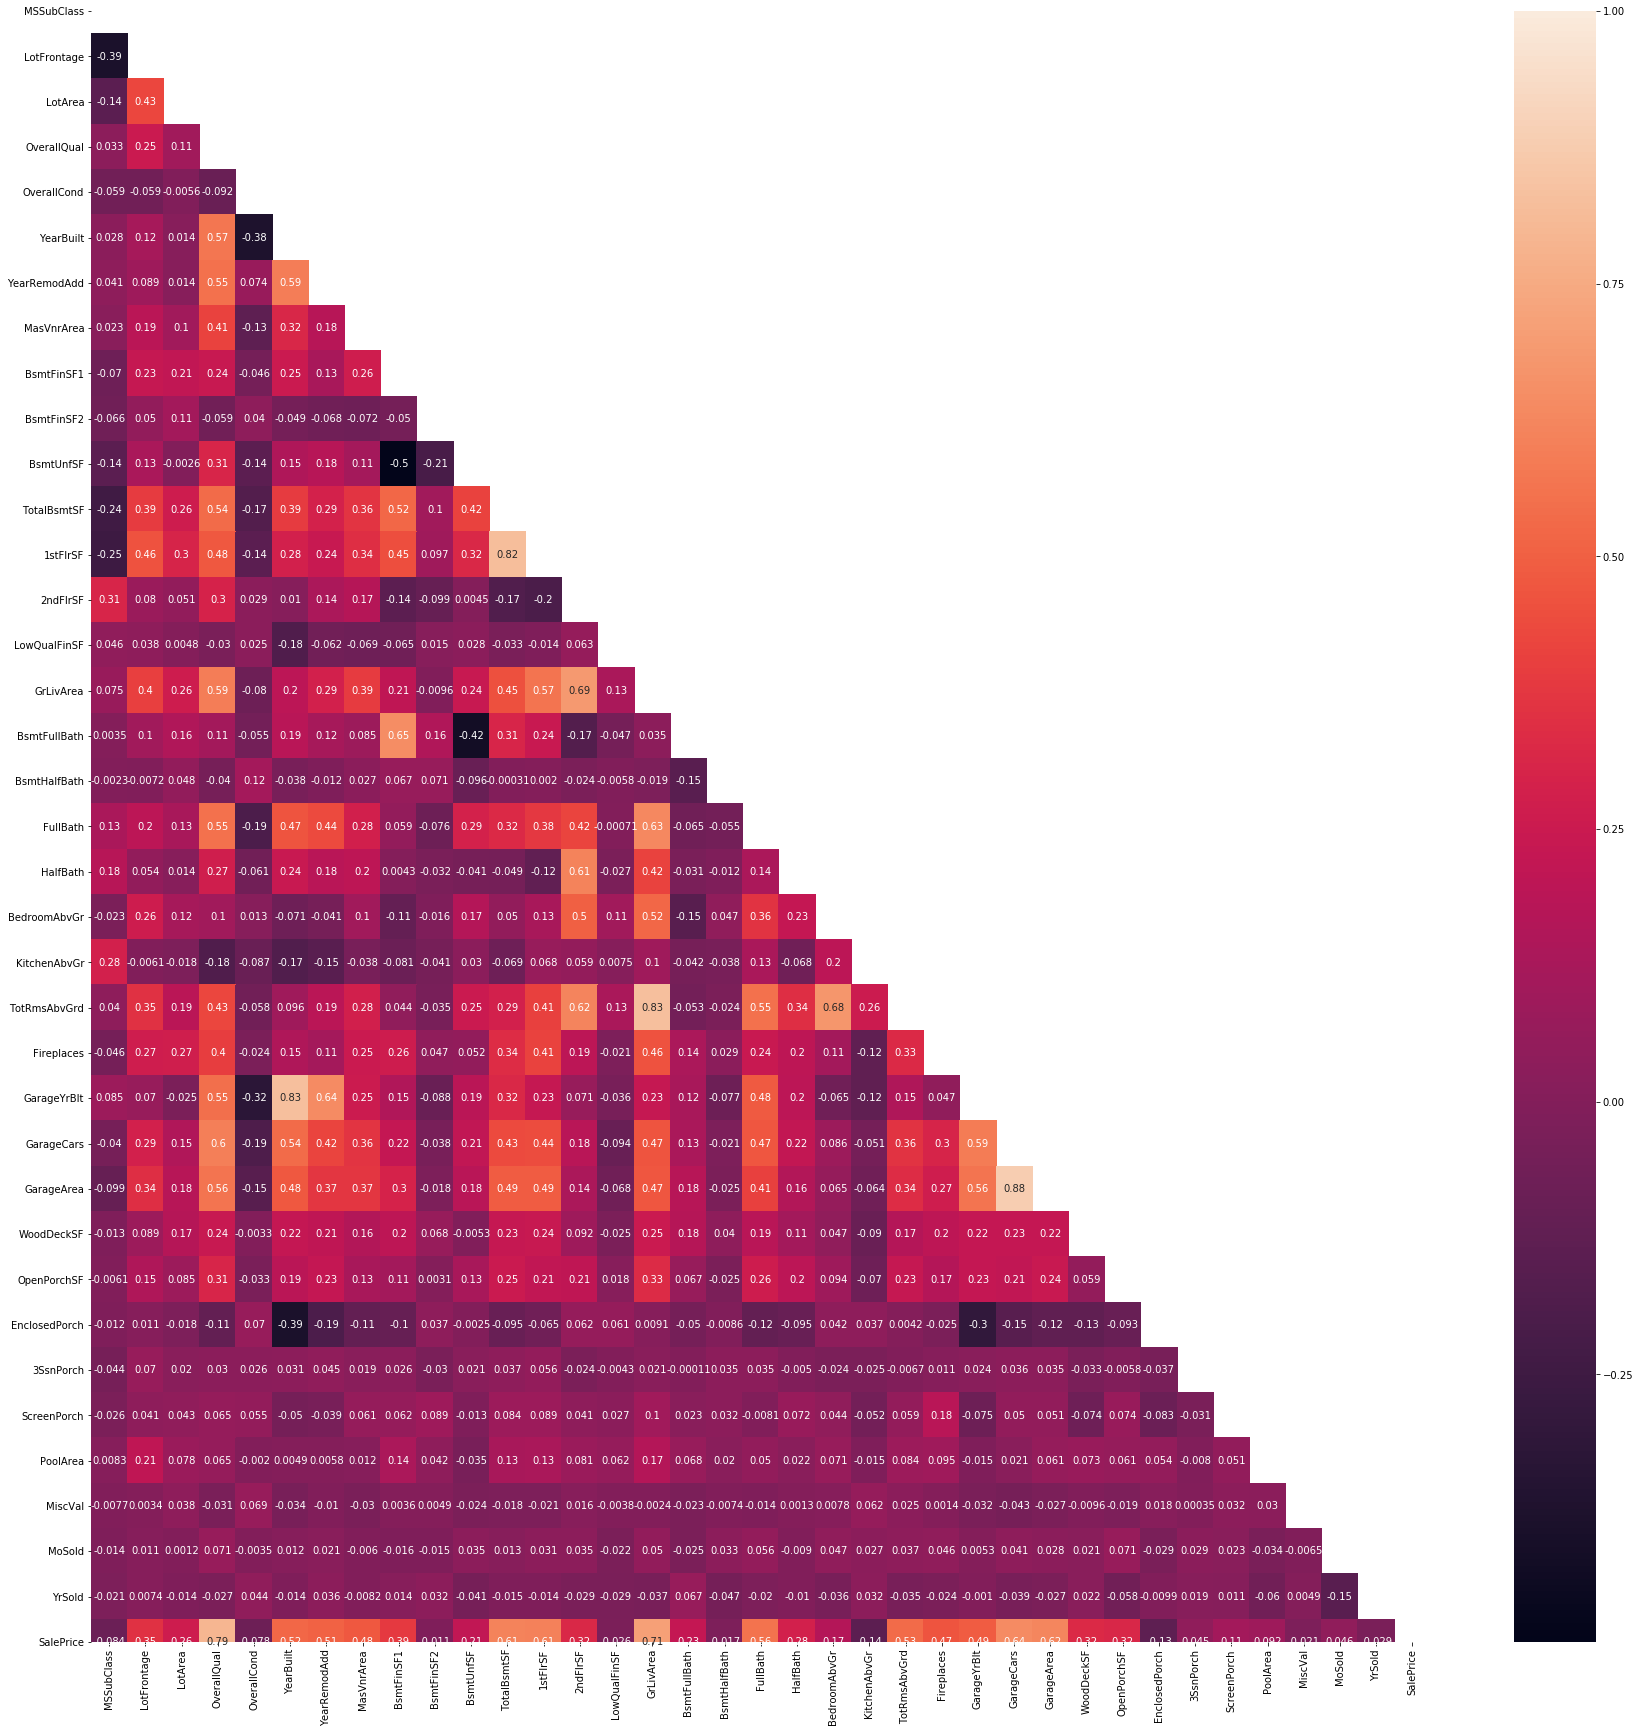

In [7]:
mask = np.zeros_like(train_data.corr())
triangel =np.triu_indices_from(mask)
mask[triangel] = True
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(),annot=True ,mask =mask)
plt.show()

In [8]:
data_num=train_data.describe().columns.tolist()
train = train_data[data_num]

In [9]:
price_corr = train['SalePrice']
data_corr=[]
for col in data_num :
    data_corr.append(price_corr.corr(train[col]))
pd.DataFrame(data={'price Corr':data_corr},index=data_num)

,price Corr
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


1.8828757597682129

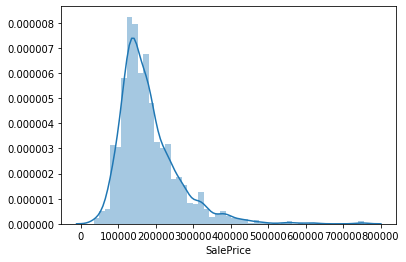

In [10]:
sns.distplot(train['SalePrice'])
train['SalePrice'].skew()

0.12133506220520406

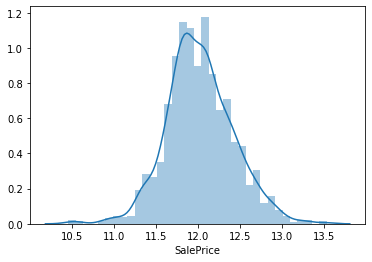

In [11]:
log_price = np.log(train['SalePrice'])
sns.distplot(log_price)
log_price.skew()

### 2.3 Split Data

In [12]:
train.isnull().any()
train.fillna(train.mean(),inplace=True)

/home/fajrin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
price = train['SalePrice']
x_features = train.drop(['SalePrice'],axis =1)
x_train,x_test,y_train,y_test=train_test_split(x_features,price,test_size = 0.4,
                                               random_state =10)


## 3 Training Algortihm and Evaluate Data
### 3.1 Model 1(Linear Regression Original data)

In [14]:
regr = LinearRegression()
regr.fit(x_train , y_train)
y_pred =regr.predict(x_train)
print('the r-square train data is :',regr.score(x_train,y_train))
print('the r-square test data is :',regr.score(x_test,y_test))

cor =[]
for i in x_train.columns :
    cor.append(y_train.corr(x_train[i]))
pd.DataFrame({'slope':regr.coef_ ,'intercept':regr.intercept_,'Corr':cor}
             ,index = x_train.columns)
    


the r-square train data is : 0.7974135813525438
the r-square test data is : 0.8157758691523609


,slope,intercept,Corr
MSSubClass,-198.754532,118260.398865,-0.090772
LotFrontage,-163.723459,118260.398865,0.323733
LotArea,0.555613,118260.398865,0.293314
OverallQual,18496.214843,118260.398865,0.786869
OverallCond,5107.790743,118260.398865,-0.062573
YearBuilt,315.490413,118260.398865,0.493802
YearRemodAdd,143.162126,118260.398865,0.499649
MasVnrArea,19.579876,118260.398865,0.423757
BsmtFinSF1,5.414045,118260.398865,0.336767
BsmtFinSF2,-6.046438,118260.398865,-0.020264


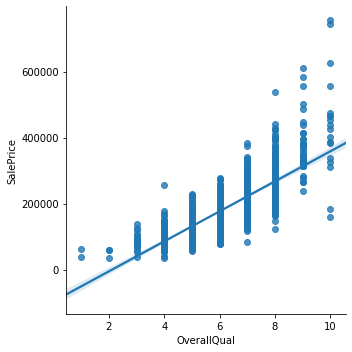

In [15]:
sns.lmplot(x='OverallQual' ,y ='SalePrice' , data=train)

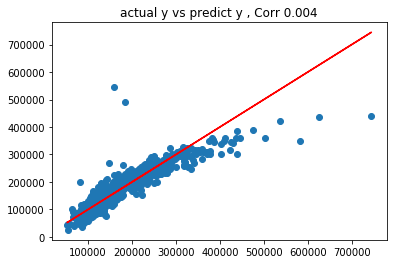

In [16]:
resid_ori = y_pred - y_train

plt.scatter(y_train,y_pred)
plt.plot(y_train ,y_train,color='red')
corr = y_train.corr(pd.Series(y_pred))
plt.title(f'actual y vs predict y , Corr {round(corr,3)}')
plt.show()

0.7814685467195985


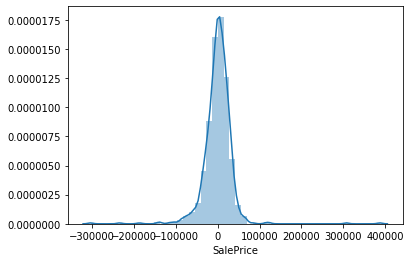

In [17]:
print(resid_ori.skew())
sns.distplot(resid_ori)

### 3.2 Model 2(Linear regression transform to log )

In [18]:
price_log = np.log(train['SalePrice'])
X_features = train.drop(['SalePrice'],axis =1)
X_train,X_test,Y_train,Y_test=train_test_split(X_features,price_log,test_size = 0.4,
                                               random_state =10)


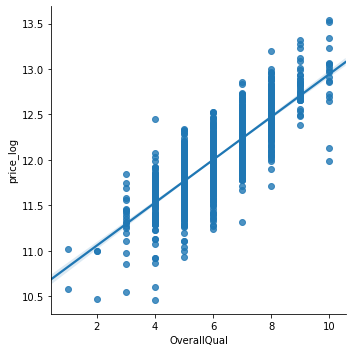

In [19]:
transformed_data = X_features
transformed_data['price_log']= price_log
transformed_data
sns.lmplot(x='OverallQual',y='price_log',data = transformed_data)

In [20]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
p_val=results.pvalues

regr_log = LinearRegression()
regr_log.fit(X_train , Y_train)
Y_pred= regr_log.predict(X_train)

cor_log=[]
for i in X_train.columns:
    cor_log.append(Y_train.corr(X_train[i]))

print('the r-square train data is :',regr_log.score(X_train,Y_train))
print('the r-square test data is :',regr_log.score(X_test,Y_test))



the r-square train data is : 0.8557394557292418
the r-square test data is : 0.8726234244450418


/home/fajrin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


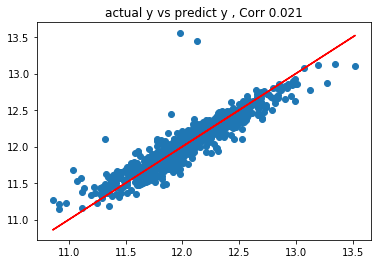

In [21]:
resid_log = Y_pred - Y_train
plt.scatter(Y_train,Y_pred)
plt.plot(Y_train ,Y_train,color='red')
corr_log = Y_train.corr(pd.Series(Y_pred))
plt.title(f'actual y vs predict y , Corr {round(corr_log,3)}')
plt.show()

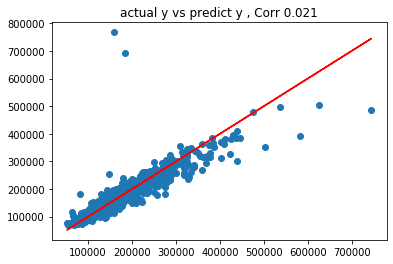

In [22]:
# reverse from log transformation to the actual value
resid_log = Y_pred - Y_train
plt.scatter(np.e**Y_train,np.e**Y_pred)
plt.plot(np.e**Y_train ,np.e**Y_train,color='red')
corr_log = Y_train.corr(pd.Series(Y_pred))
plt.title(f'actual y vs predict y , Corr {round(corr_log,3)}')
plt.show()

2.4771738588142798


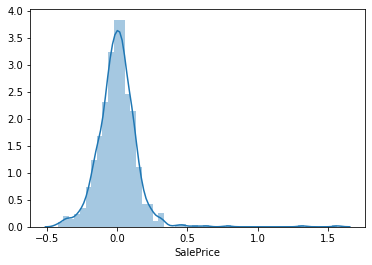

In [23]:
print(resid_log.skew())
sns.distplot(resid_log)

### 3.3 P-Values

In [24]:
col = X_features.columns.tolist()
cor =X_features.corr()
cor_high=cor.index[cor['price_log']>0.3].tolist()
low_cor=[]
for c in col :
    if c in cor_high :
        print(c)
    else :
        low_cor.append(c)


LotFrontage
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
HalfBath
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
price_log


In [25]:
low_cor

['MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [26]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
p_val=results.pvalues
high_p=p_val.index[p_val>0.05].tolist()
print(round(p_val,3))

const            0.028
MSSubClass       0.000
LotFrontage      0.074
LotArea          0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.009
MasVnrArea       0.460
BsmtFinSF1       0.374
BsmtFinSF2       0.993
BsmtUnfSF        0.755
TotalBsmtSF      0.373
1stFlrSF         0.183
2ndFlrSF         0.279
LowQualFinSF     0.408
GrLivArea        0.000
BsmtFullBath     0.000
BsmtHalfBath     0.704
FullBath         0.036
HalfBath         0.758
BedroomAbvGr     0.638
KitchenAbvGr     0.014
TotRmsAbvGrd     0.013
Fireplaces       0.000
GarageYrBlt      0.585
GarageCars       0.000
GarageArea       0.995
WoodDeckSF       0.000
OpenPorchSF      0.215
EnclosedPorch    0.037
3SsnPorch        0.271
ScreenPorch      0.000
PoolArea         0.019
MiscVal          0.994
MoSold           0.324
YrSold           0.075
dtype: float64


/home/fajrin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3.5 Model 3(Drop Data Based on Low Correlation and High P values)

In [27]:
print(high_p)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold']


In [28]:
print(low_cor)

['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [29]:
drop_data = []
for i in low_cor :
    if i in high_p :
        drop_data.append(i)

drop_data.append('SalePrice')
drop_data

['BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [30]:
price_log = np.log(train['SalePrice'])
X_features = train.drop(drop_data,axis =1)
X_train,X_test,Y_train,Y_test=train_test_split(X_features,price_log,test_size = 0.4,
                                               random_state =10)


In [31]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
p_val=results.pvalues

regra = LinearRegression()
regra.fit(X_train,Y_train)

cor_log=[]
for i in X_train.columns:
    cor_log.append(Y_train.corr(X_train[i]))
    
fix=pd.DataFrame({'slope':regra.coef_,'intercept':regra.intercept_
             , 'Corr':cor_log ,'P-Values':round(p_val,4)} , index=X_train.columns )
fix

,slope,intercept,Corr,P-Values
MSSubClass,-0.000827,3.291307,-0.096782,0.0000
LotFrontage,-0.000518,3.291307,0.333681,0.0580
LotArea,0.000002,3.291307,0.279888,0.0000
OverallQual,0.088640,3.291307,0.813293,0.0000
OverallCond,0.047112,3.291307,-0.029443,0.0000
YearBuilt,0.002958,3.291307,0.559681,0.0000
YearRemodAdd,0.000993,3.291307,0.554926,0.0071
MasVnrArea,-0.000022,3.291307,0.387708,0.4870
BsmtFinSF1,0.000011,3.291307,0.323274,0.5265
TotalBsmtSF,0.000018,3.291307,0.575401,0.4346


In [32]:
fix=fix[fix['Corr']>0.4]
fix1=fix[fix['P-Values']<1]
fix1

,slope,intercept,Corr,P-Values
OverallQual,0.088640,3.291307,0.813293,0.0000
YearBuilt,0.002958,3.291307,0.559681,0.0000
YearRemodAdd,0.000993,3.291307,0.554926,0.0071
TotalBsmtSF,0.000018,3.291307,0.575401,0.4346
1stFlrSF,-0.000020,3.291307,0.563877,0.8464
GrLivArea,0.000206,3.291307,0.677433,0.0424
FullBath,0.030313,3.291307,0.563139,0.0457
TotRmsAbvGrd,0.015660,3.291307,0.510300,0.0105
Fireplaces,0.037206,3.291307,0.463294,0.0001
GarageYrBlt,-0.000208,3.291307,0.492334,0.5816


In [33]:
y_pred=regra.predict(X_train)

In [34]:
pd.DataFrame({'Y_predict':y_pred,'actual_Y':Y_train})

,Y_predict,actual_Y
858,12.062144,11.931636
253,11.947164,11.970350
249,12.574021,12.531773
835,11.773315,11.759786
205,12.082414,12.103486
...,...,...
1393,11.814230,12.001505
1344,12.178827,11.956553
527,12.851865,13.008659
1149,12.040690,11.870600
